### IBM HR Analytics

In [317]:
# importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")


In [318]:
data = pd.read_csv('https://raw.githubusercontent.com/sandespalakat/Datascience/main/HR-Analytics/Data/hr-employee.csv')

In [319]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [320]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [321]:
data["EmployeeCount"].nunique()

1

In [322]:
data["EmployeeNumber"].nunique()

1470

In [323]:
data["StandardHours"].nunique()

1

In [324]:
data["Over18"].nunique()

1

In [325]:
#since employee count has only one value we can drop this
# all employee numbers are different so we can drop this
# we can drop Standard hour because all values are 8
#Over18 column has only single value

In [326]:
data.drop(["EmployeeCount", "EmployeeNumber", "StandardHours", "Over18"], inplace=True, axis=1)

In [327]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

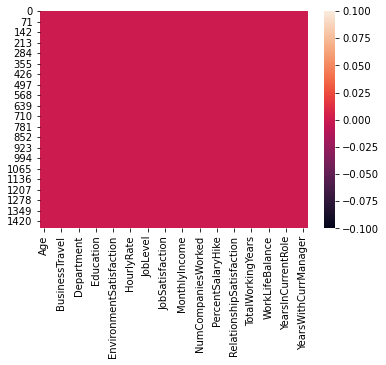

In [328]:
sns.heatmap(data.isnull())

In [329]:
#There is no empty values

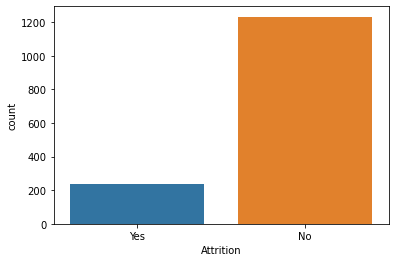

In [330]:
sns.countplot(data["Attrition"])

In [331]:
print("Percentage of Attrition 'Yes'",(len(data[data.Attrition == "Yes"]))/len(data))

Percentage of Attrition 'Yes' 0.16122448979591836


In [332]:
#the output data is imblanced. only 16% is "Yes"

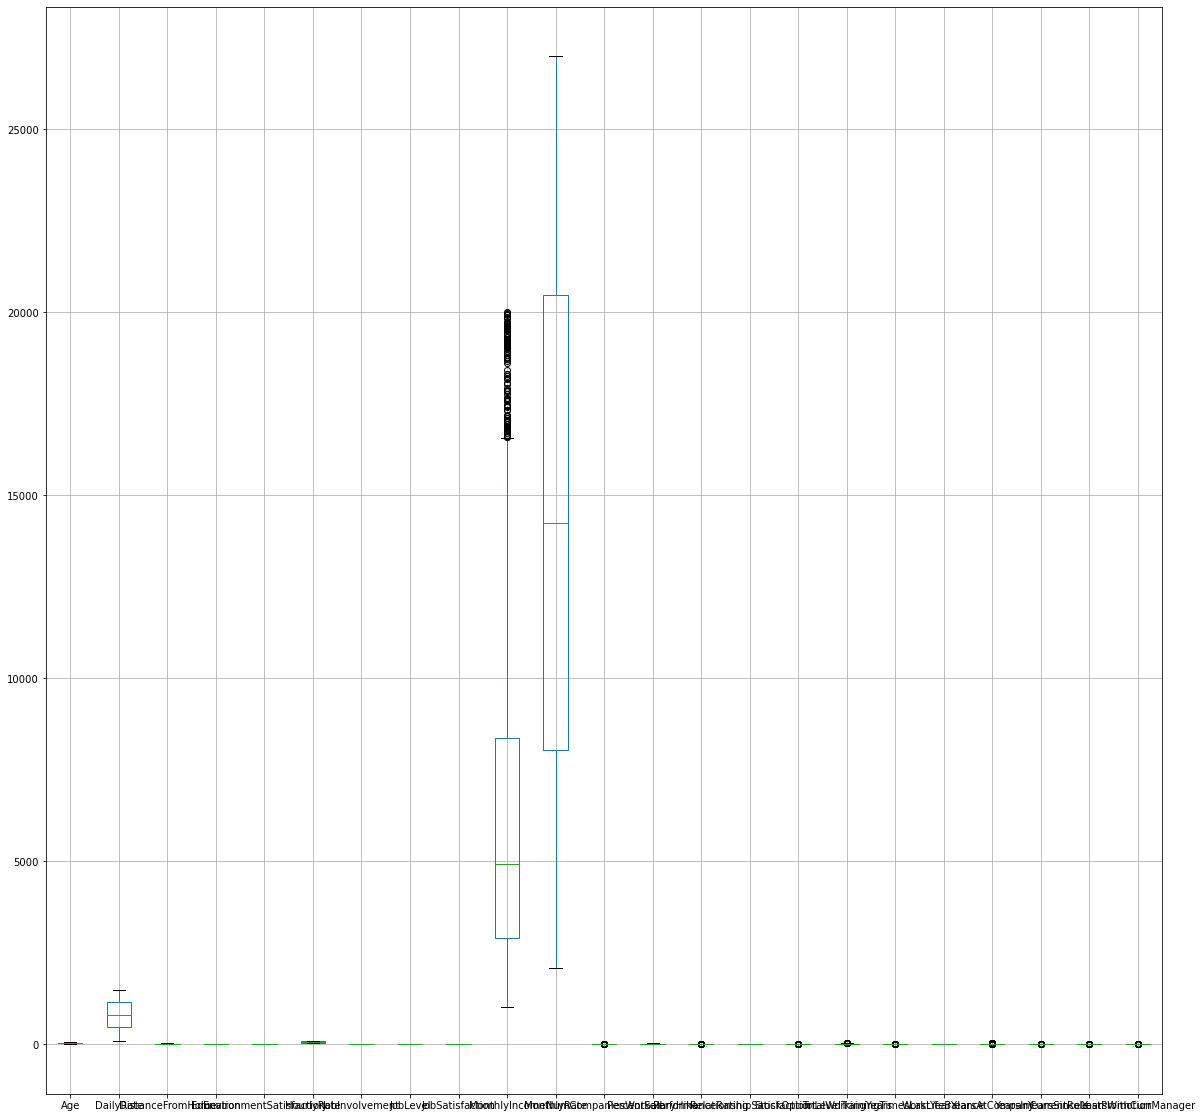

In [333]:
plt.figure(figsize=(20,20))
data.boxplot()

In [334]:
#Oulier found in Monthly Income

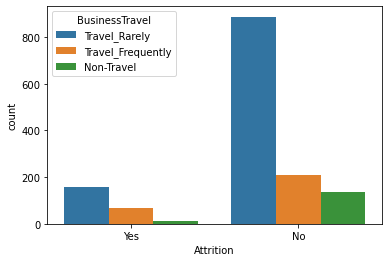

In [335]:
sns.countplot("Attrition", data=data, hue="BusinessTravel")

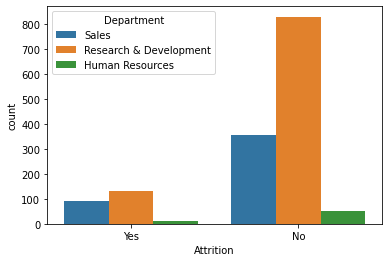

In [336]:
sns.countplot("Attrition", data=data, hue="Department")

In [337]:
#research and development has more attribution

In [338]:
data.Education.unique()

array([2, 1, 4, 3, 5], dtype=int64)

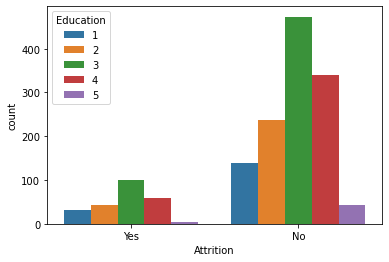

In [339]:
sns.countplot("Attrition", data=data, hue="Education")

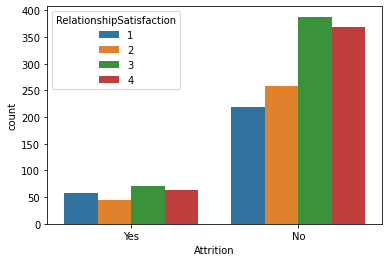

In [340]:
sns.countplot("Attrition", data=data, hue="RelationshipSatisfaction")

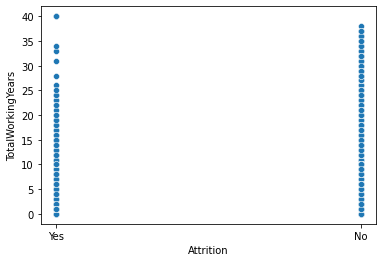

In [341]:
sns.scatterplot(data.Attrition, data.TotalWorkingYears)

In [342]:
#Corelation 
cor_data = data.corr()

In [343]:
cor_data

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


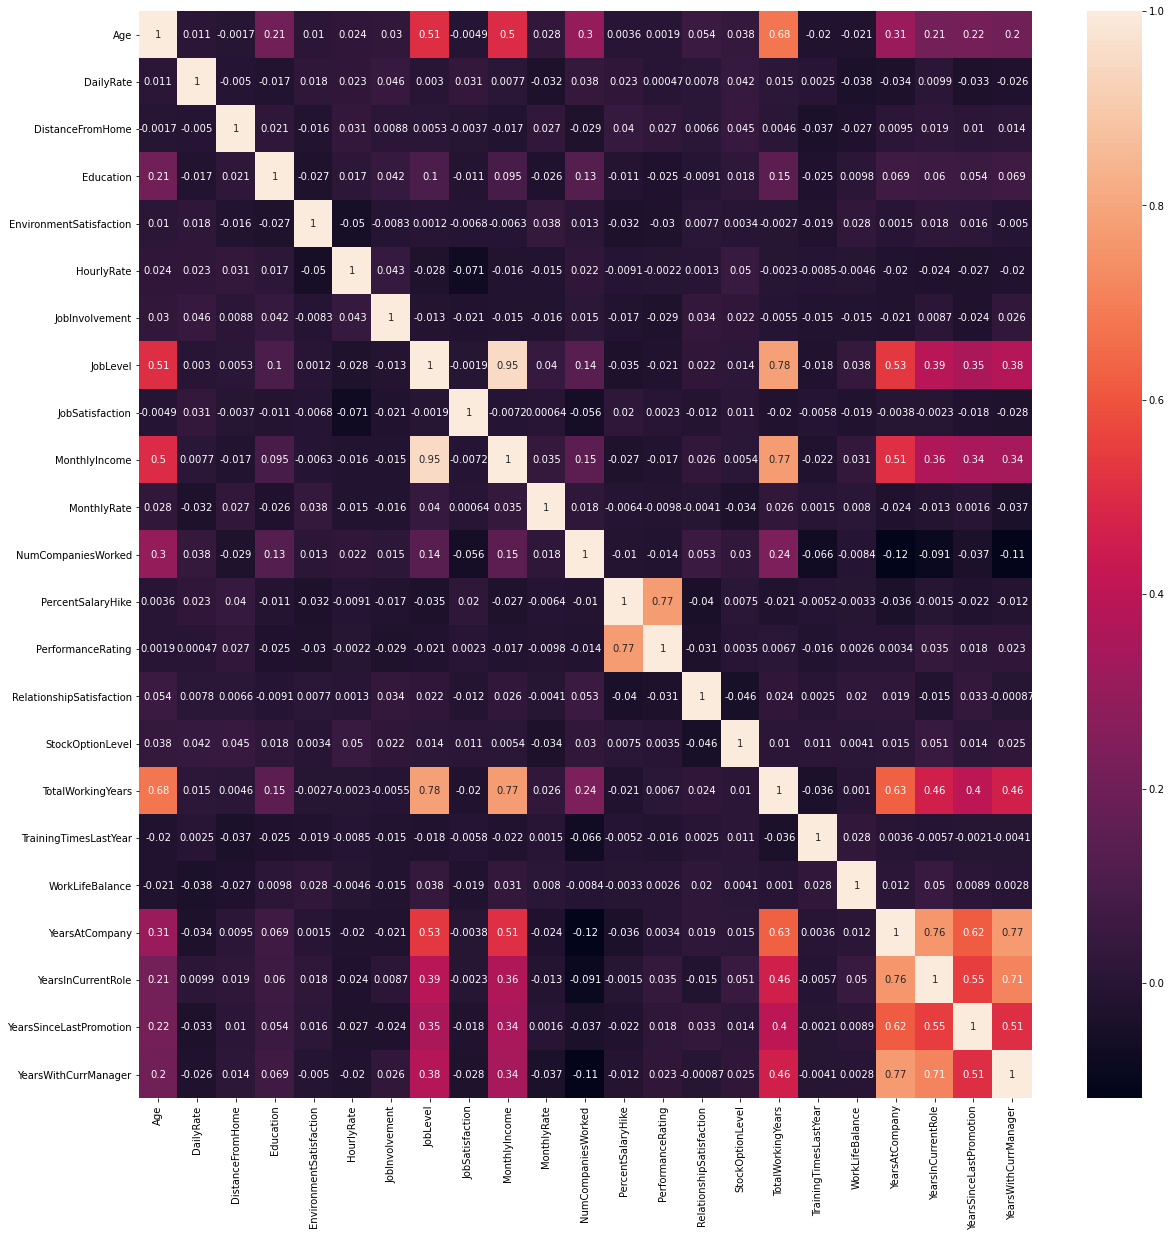

In [344]:
plt.figure(figsize=(20,20))
sns.heatmap(cor_data,annot=True)
plt.show()

In [345]:
# Total working years is positively corelated

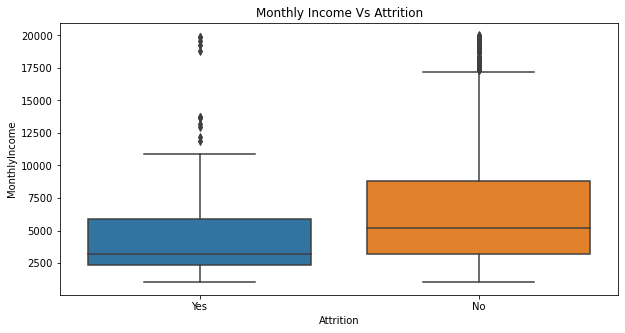

In [346]:
#Attrition and renumeration quality 
#Monthly Income and Attrition Box plot 
#Checking How Attrition is effected by Monthly Income
plt.figure(figsize=(10,5))
sns.boxplot(y = 'MonthlyIncome' , x='Attrition' , data=at)
plt.title("Monthly Income Vs Attrition");

In [347]:
#Low monthly income inversely corelated with attrition

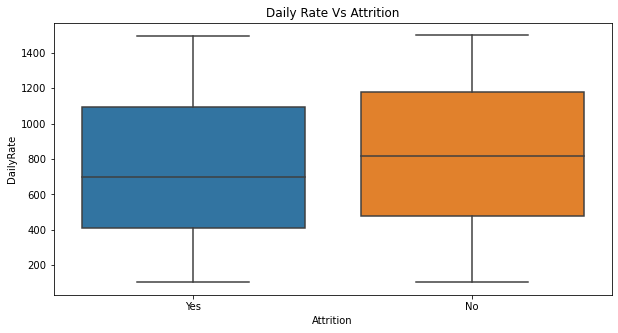

In [348]:
plt.figure(figsize=(10 , 5))
plt.title("Daily Rate Vs Attrition")
sns.boxplot(y = 'DailyRate' , x='Attrition' , data=at)

#Here we can see that people less daily rate have higher chances of Attrition

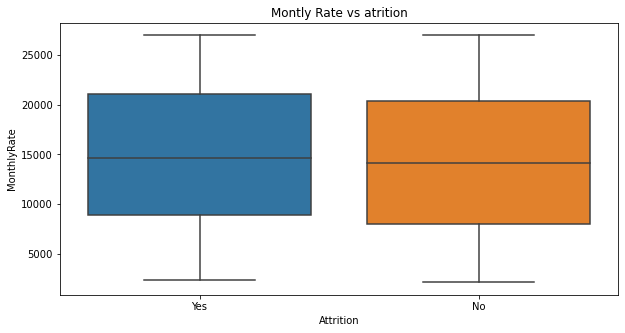

In [349]:
#Checking How Attrition is effected by Monthly Rates 
plt.figure(figsize=(10 , 5))
sns.boxplot(y = 'MonthlyRate' , x='Attrition' , data=at)
plt.title("Montly Rate vs atrition");


In [350]:
data[data.OverTime == "Yes"].OverTime

0       Yes
2       Yes
3       Yes
6       Yes
11      Yes
       ... 
1450    Yes
1456    Yes
1459    Yes
1461    Yes
1467    Yes
Name: OverTime, Length: 416, dtype: object

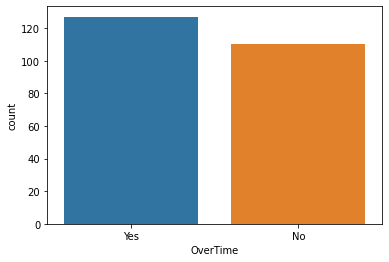

In [351]:
sns.countplot(data[data.Attrition == "Yes"].OverTime)

In [352]:
#people who are  taking overtime has a a chance to leave

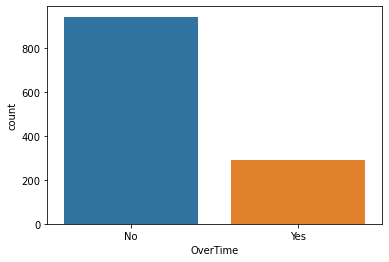

In [353]:
sns.countplot(data[data.Attrition == "No"].OverTime)

In [354]:
#Here only less than 30% of the people who are not leaving takes over time 

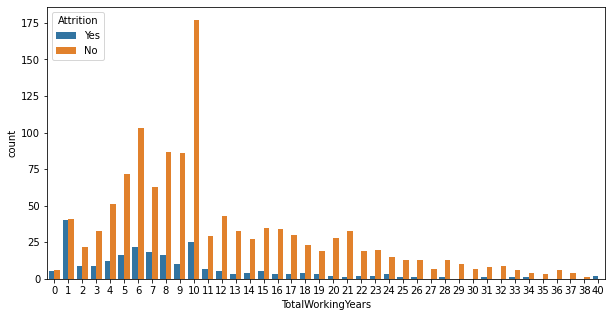

In [355]:
plt.figure(figsize=(10,5))
sns.countplot(x='TotalWorkingYears' ,hue='Attrition' , data=data)

In [356]:
#High rate of attrition when experience is between 6 -10 years

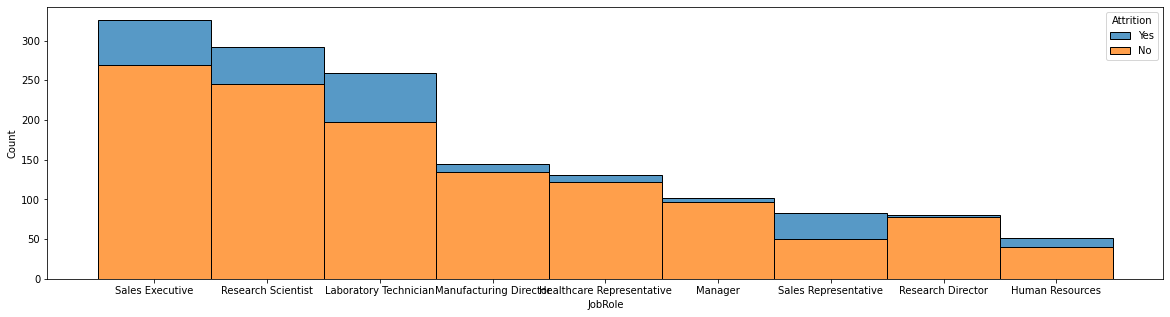

In [357]:
#Years at Company vs Jobrole vs Attrition 
plt.figure(figsize=(20,5))
sns.histplot(x='JobRole' ,hue='Attrition' , data=at , multiple='stack')

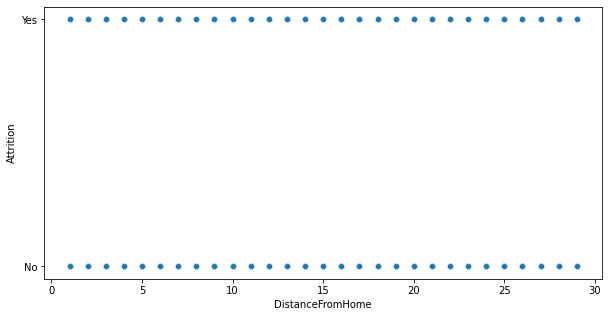

In [358]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='DistanceFromHome' ,y='Attrition' , data=data )


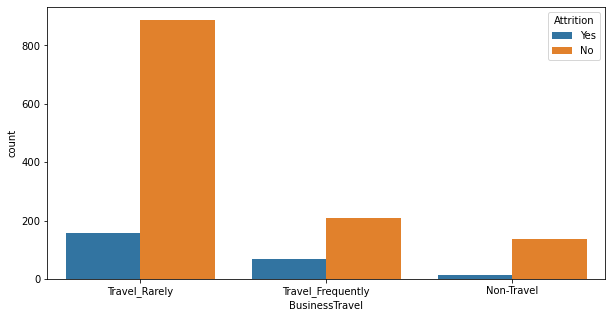

In [359]:
#Here 
plt.figure(figsize=(10 , 5))
sns.countplot(x='BusinessTravel' , hue='Attrition' ,data=data);

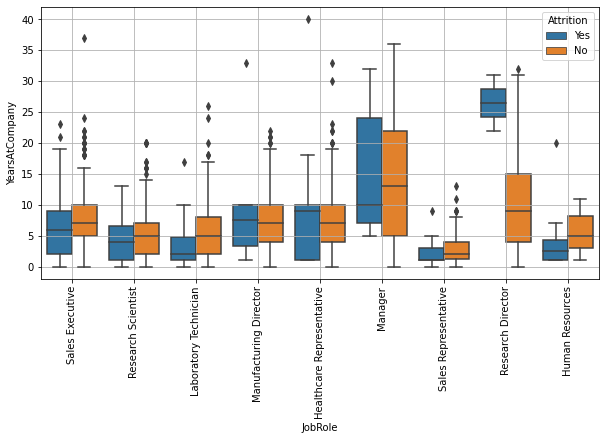

In [360]:

plt.figure(figsize=(10 ,  5))
sns.boxplot(y='YearsAtCompany' , hue='Attrition' , x='JobRole' , data=at)
plt.grid()
plt.xticks(rotation=90);

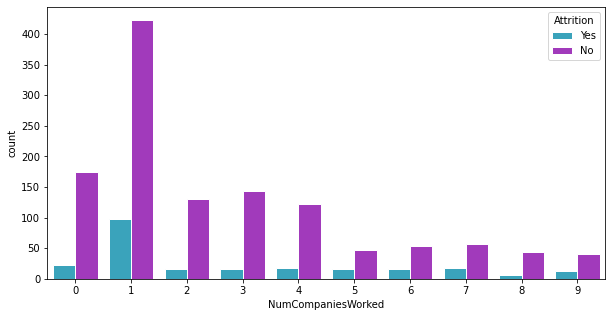

In [361]:
plt.figure(figsize=(10,5))
sns.countplot(x='NumCompaniesWorked' , hue='Attrition' , data=at   , palette=('#24b1d1', '#ae24d1'), edgecolor='white')

In [362]:
#Encoding
columns = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime']
for i in columns:
    le=LabelEncoder()
    data[i] = le.fit_transform(data[i])

In [363]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,1,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,4,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2,1,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,4,1,...,3,4,0,17,3,2,9,6,0,8


In [364]:
from scipy.stats import zscore

In [365]:
z_score = np.abs(zscore(data))

In [366]:
z_score

array([[0.4463504 , 2.28090588, 0.59004834, ..., 0.0632959 , 0.67914568,
        0.24583399],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.76499762, 0.36871529,
        0.80654148],
       [0.008343  , 2.28090588, 0.59004834, ..., 1.16768726, 0.67914568,
        1.15593471],
       ...,
       [1.08667552, 0.4384223 , 0.59004834, ..., 0.61549158, 0.67914568,
        0.31487349],
       [1.32236521, 0.4384223 , 0.91319439, ..., 0.48889978, 0.67914568,
        1.08689522],
       [0.32016256, 0.4384223 , 0.59004834, ..., 0.33939374, 0.36871529,
        0.59522723]])

In [367]:
attr = data[(z_score < 3).all(axis=1)]

In [368]:
#outlier is removed

In [369]:
x = attr.loc[ : , attr.columns != 'Attrition']

In [370]:
y = attr.loc[:,attr.columns == "Attrition"]

In [371]:
#finding best random state
max_acc = 0
max_rs = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = i)
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > max_acc:
        max_acc = acc
        max_rs = i
print("Best random state=",max_rs)

Best random state= 180


In [372]:
#best random state is 180
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .22, random_state = 180)

In [373]:
models = {"SVC":SVC(),"KNN":KNeighborsClassifier(), "RandomForest":RandomForestClassifier(),"LogisticRegression":LogisticRegression(), "naive":GaussianNB() }
acc = {}
mod_list = []
for i in models:
    mod = i
    mod = models[i]
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    sc = accuracy_score(y_test,pred)
    acc[i] = sc
    mod_list.append(mod)
print(acc)

{'SVC': 0.8856209150326797, 'KNN': 0.8529411764705882, 'RandomForest': 0.8986928104575164, 'LogisticRegression': 0.8888888888888888, 'naive': 0.7156862745098039}


In [374]:
#applying cross validation
from sklearn.model_selection import cross_val_score

In [375]:
cv_list = {}
for i in mod_list:
    cv = cross_val_score(i, x, y, cv=7)
    cv_list[str(i)] = cv.mean()
print(cv_list)

{'SVC()': 0.8348959806246238, 'KNeighborsClassifier()': 0.8183232178207052, 'RandomForestClassifier()': 0.857240749200548, 'LogisticRegression()': 0.8399428600433625, 'GaussianNB()': 0.7685396680371556}


In [376]:
#KNN is the best algorithm

In [377]:
#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [385]:
parameters = {'leaf_size': list(range(1,50)),  
              'n_neighbors': list(range(1,30)), 
              'p': [1,2]}

In [386]:
GCV = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)

In [387]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]})

In [381]:
GCV.best_params_

{'leaf_size': 1, 'n_neighbors': 14, 'p': 2}

In [382]:
GCV_predict = GCV.best_estimator_.predict(x_test)

In [383]:
accuracy_score(y_test, GCV_predict)

0.8790849673202614

In [384]:
#saving model
import joblib
joblib.dump(GCV.best_estimator_, "IBM-HR.obj")

['IBM-HR.obj']